In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Final/Lamarck/Lamarck_percent.csv"
lamarck = pd.read_csv(path,header=0,index_col=[0])
print(lamarck.shape)
print(lamarck.shape)

path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Final/SSGA/SSGA_percent.csv"
SSGA = pd.read_csv(path,header=0,index_col=[0])
print(SSGA.shape)

path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Final/Baldwin/Baldwin_percent.csv"
baldwin = pd.read_csv(path,header=0,index_col=[0])
print(baldwin.shape)

df_together = pd.concat([lamarck,SSGA,baldwin],axis=0,keys=["Lamarck","SSGA","Baldwin"])
print(df_together.shape)
df_together = df_together.applymap(lambda x:x if not '%' in str(x) else x.replace('%',''))
print(df_together.dtypes)

(23, 20)
(23, 20)
(23, 20)
(23, 20)
(69, 20)
590    object
593    object
579    object
588    object
589    object
591    object
576    object
587    object
569    object
558    object
592    object
572    object
594    object
542    object
570    object
562    object
575    object
573    object
552    object
555    object
dtype: object


         Function     
Lamarck  F1        590      0
                   593      0
                   579      0
                   588      0
                   589      0
                         ... 
Baldwin  F23       562     80
                   575    100
                   573     70
                   552     80
                   555     70
Length: 1380, dtype: object

,Function,Algorithm,Combinations,Percent
0,F1,Lamarck,590,0
1,F1,Lamarck,593,0
2,F1,Lamarck,579,0
3,F1,Lamarck,588,0
4,F1,Lamarck,589,0
...,...,...,...,...
1375,F23,Baldwin,562,80
1376,F23,Baldwin,575,100
1377,F23,Baldwin,573,70
1378,F23,Baldwin,552,80


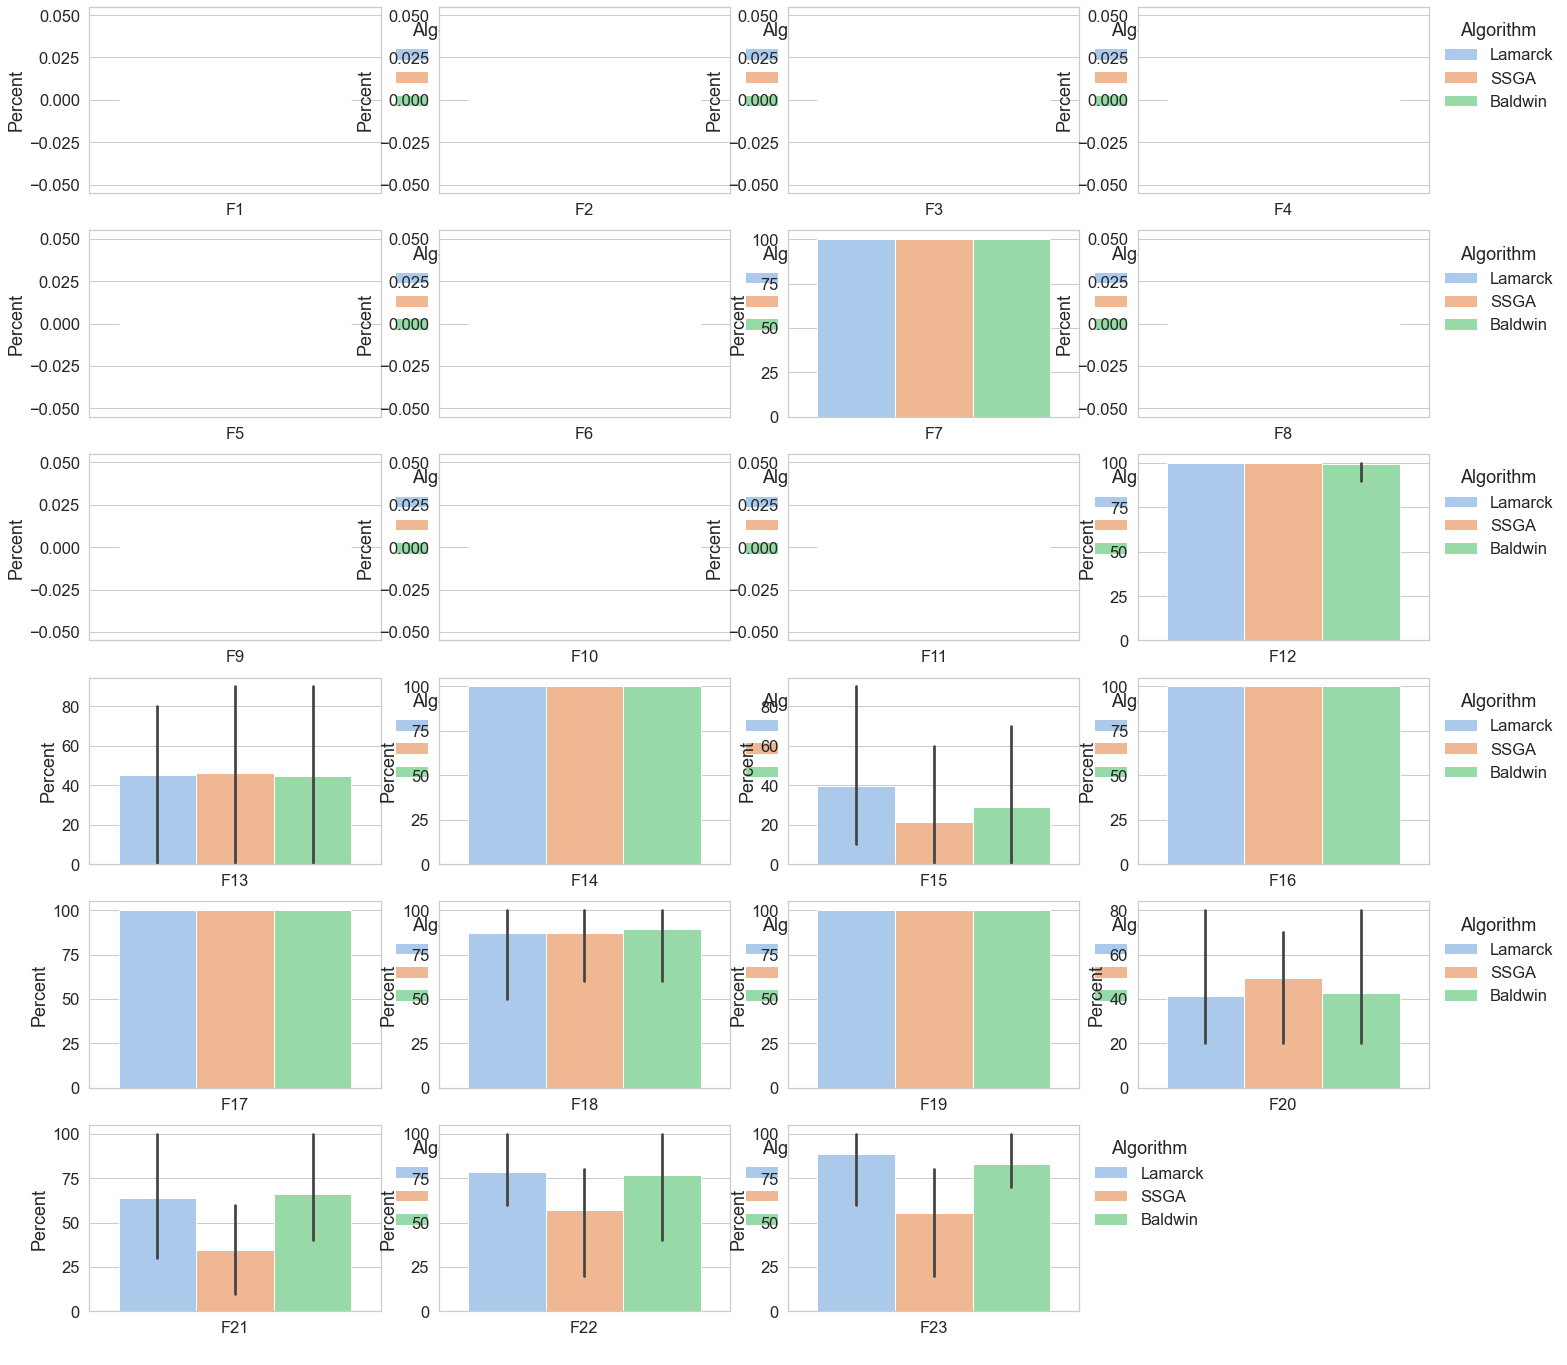

In [3]:
import seaborn as sns
dataframe = df_together
dataframe = dataframe.stack()
display(dataframe)
dataframe = dataframe.rename_axis(index=["Algorithm","Function","Combinations"])
dataframe = dataframe.reset_index(level=[0, 2], name="Percent")
dataframe["Percent"] = pd.to_numeric(dataframe["Percent"])
dataframe = dataframe.reset_index(drop=False)
display(dataframe)
function_list = ["F" + str(i) for i in range(1, 24, 1)]
mode_list=["SSGA","Baldwin","Lamarck"]
def show_graph(dataframe):
    sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
    sns.color_palette("viridis", as_cmap=True)
    dist_cols = 4
    dist_rows = 6
    plt.figure(figsize=(6 * dist_cols, 4 * dist_rows))
    i = 1
    for func in function_list:
        plt.subplot(dist_rows, dist_cols, i)
        data = dataframe[dataframe["Function"] == func]
        # ax = sns.barplot(data=dataframe,y="Percent",x="Function",hue="Algorithm",dodge=True,ci=100)
        ax = sns.barplot(data=data,y="Percent",x="Function",hue="Algorithm",errorbar=("pi", 100))
        plt.xlabel(" ")
        # plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
        # plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),frameon=False)
        i=i+1
    plt.savefig("./barplot_percent_3.png", dpi=1200,bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)